<img src="https://pbs.twimg.com/profile_images/997746419732639744/B2If50il_400x400.jpg">

# 	Introduction to Machine Learning
### Ali Alperen ASLAN 
### HW1 

In [55]:
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.datasets import load_boston
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.linear_model import Ridge




In [56]:
#Linear Regression 
###Veri Yukleme
boston = datasets.load_boston()

df = pd.DataFrame(data = boston.data)
df.columns = boston.feature_names
df['Target'] = boston.target
#df.head()

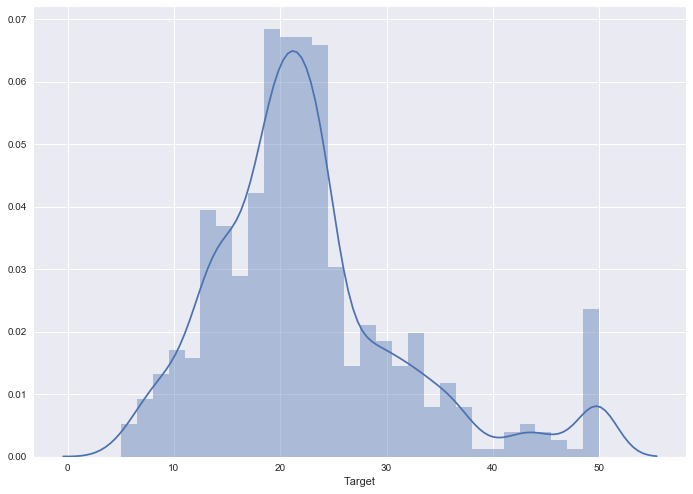

In [57]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Target'], bins=30)
plt.show()

Y değerlerinin dağılımına baktığımızda normal dağılıma sahiptir diyebiliriz.Bir kaç extrem değerlere sahip fakat genel anlamda normal dağılıma sahiptir.

# Kolerasyon katsayıları 

Kolerasyon katsayıları -1 ve 1 arasında değişkenlik gösterir. 
    1 olduğunda güçlü pozitif kolerasyon 
    1 olduğunda güçlü negatif kolerasyon olduğu anlamına gelir .

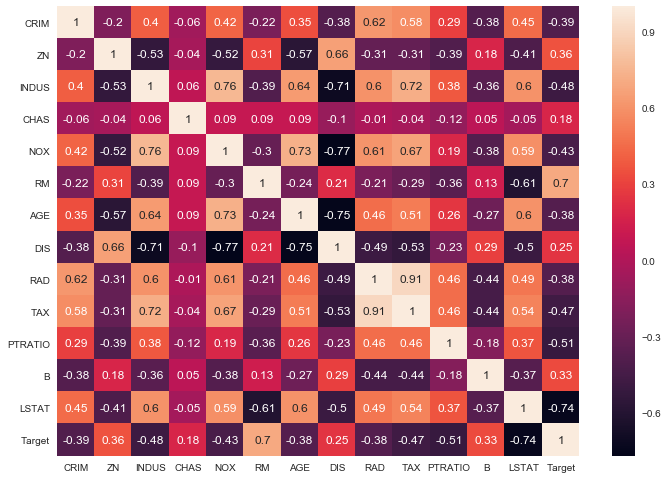

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [59]:
#veri on isleme
X = df.iloc[:,0:13]
Y = df.iloc[:,13:14]
#Y.head()
#X.head()
#verilerin egitim ve test icin bolunmesi
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=5)
#verilerin olceklenmesi
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_train = sc.fit_transform(Y_train)
Y_test = sc.fit_transform(Y_test)



In [60]:
#(linear regression)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.49484010126706607
R2 score is 0.7551332741779998


The model performance for testing set
--------------------------------------
RMSE is 0.5534846874826429
R2 score is 0.6936547007222411


# 1

# Linear Regression Coefficients 

In [61]:
result = zip( boston.feature_names,lin_model.coef_[0])

for i in result:
    print(i)

('CRIM', -0.1468379393555797)
('ZN', 0.09646572440144002)
('INDUS', -0.018713079233413275)
('CHAS', 0.021218586174841726)
('NOX', -0.1663862773681142)
('RM', 0.3124182991532988)
('AGE', -0.03664170914534451)
('DIS', -0.310260975019639)
('RAD', 0.33305279426844686)
('TAX', -0.25437833248179764)
('PTRATIO', -0.2388211670653676)
('B', 0.11846488200415844)
('LSTAT', -0.3732650878205353)


# 2

In [62]:
#Ridge Regression

X_F1, y_F1 = make_friedman1(n_samples= 100,
n_features= 7, random_state=0)
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_F1)
X_train, X_test, y_train, y_test= train_test_split(X_F1_poly, y_F1,random_state = 0)
RidgeR= Ridge().fit(X_train, y_train)

print('Ridge Regression model coeff(w):\n{}'.format(RidgeR.coef_))
print(' Ridge Regression intercept (b): {:.3f}'.format(RidgeR.intercept_))
print('R-squared score (training): {:.3f}'.format(RidgeR.score(X_train,y_train)))
print('R-squared score (test): {:.3f}\n'.format(RidgeR.score(X_test, y_test)))

print('-----------------------------------------------')

scaler = StandardScaler()
X_std = scaler.fit_transform(X_F1)
regr_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])
model_cv = regr_cv.fit(X_std, y_F1)
print('best selected alpha: ', model_cv.alpha_)

Ridge Regression model coeff(w):
[ 0.          2.27145768  4.60503159 -3.62031494  3.42185822  1.44960483
 -0.47296587 -0.06531926 -0.19355625  2.30942021 -0.15712502  2.10234811
  1.75923777  0.42895572 -0.25269699  1.00534812  0.63513628  1.61530667
  0.74858238  1.7592991   0.42539835  0.33628393 -0.70838295 -0.30990927
 -1.89562662 -0.18207606  2.38499517  1.16555244  0.32235135  0.1225605
  0.68668744 -0.77794957  0.70214942 -0.0464542   1.24371358 -0.16160503
 -1.60816722 -0.93019281 -0.34364322  0.29377806  0.34325213 -0.68760309
 -1.97792564 -1.05453979  0.77001716  0.41975305  0.18653637  0.82899292
 -0.77457965  1.70011814  0.08087811  1.23632711 -0.4636143   0.20236108
  1.25132247  0.80275683  0.51264275 -0.45869246  1.21320371 -0.43312844
  0.37774806  0.50210173  0.66784741 -1.17823116 -1.72894836 -0.73316839
 -0.65333379 -1.84100803  0.16486493 -1.59813634  1.85954223 -1.00979903
 -0.46136202 -0.13274629  0.39766619  0.47355249 -0.28118198 -0.00863199
 -0.99317298  0.264

# 3-A

In [63]:
##Gradient Descent
#Normalize the data
df2 = df.copy()
df2 = (df2 - df2.mean())/df2.std()
df2.head()

## Veri ön işleme
Xg = df2.iloc[:,0:13]
ones = np.ones([Xg.shape[0],1])
Xg = np.concatenate((ones,Xg),axis=1)
Yg = df2.iloc[:,13:14].values 


theta = np.zeros([1,14])
alphaG = [0.001, 0.01, 0.1]
iters = 1000

# 3-B

In [64]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))
# gradient descent function
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    return theta,cost

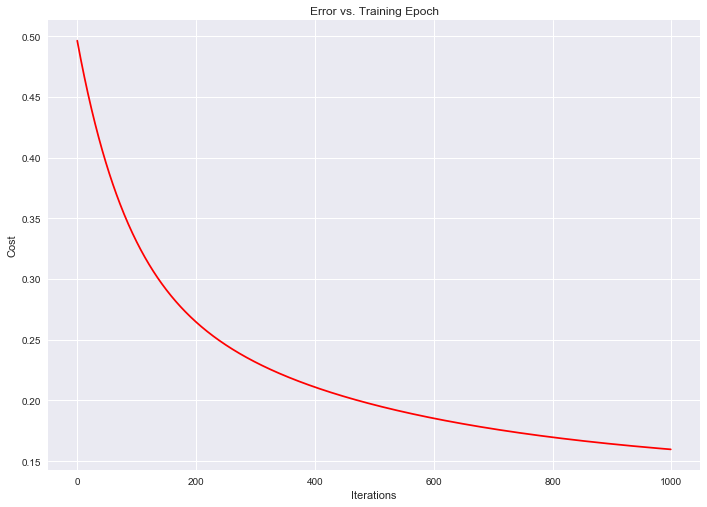

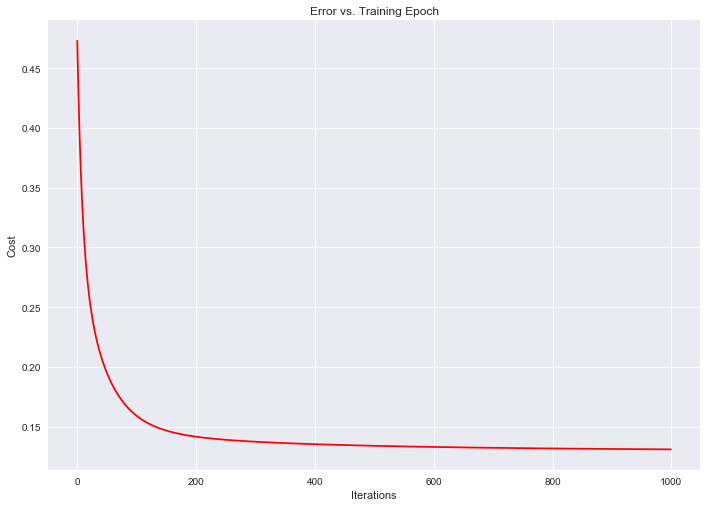

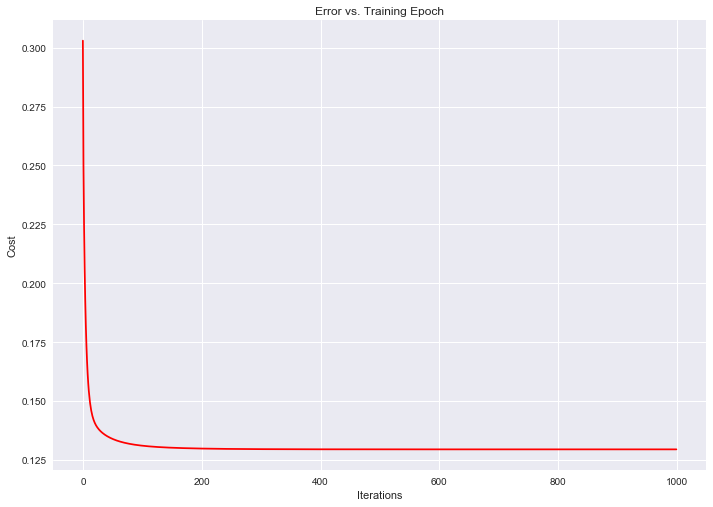

In [65]:
# farklı alpha değerleriyle gradient descent uygulaması 
for alph in alphaG:
    g,cost = gradientDescent(Xg,Yg,theta,iters,alph)
    #print(g)
    finalCost = computeCost(Xg,Yg,g)
    fig, ax = plt.subplots()  
    ax.plot(np.arange(iters), cost, 'r')  
    ax.set_xlabel('Iterations')  
    ax.set_ylabel('Cost')  
    ax.set_title('Error vs. Training Epoch')


# 3-C  

 3. Grafikte karşılaştığımız gibi alpha 0.1 olarak belirlendiğinden yaklaşık 200 iterasyon sonra minimum error seviyesine ulaşmış oluruz.


In [ ]:
Kaynakça 
Gradient Descent https://medium.com/we-are-orb/multivariate-linear-regression-in-python-without-scikit-learn-7091b1d45905
Multiple Linear Regresyon  https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
Ridge Regression https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b